# H1 Notebook 2 - Homer Kay

In [1]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [2]:
 # Checking Current Directory
%pwd

'/Users/homerkay/Desktop/6303 Predictive Models/HMWK 1/Notebooks'

In [3]:
# Change Directory
%cd /Users/homerkay/Desktop/Pred_Models_git-master/Week 2

/Users/homerkay/Desktop/Pred_Models_git-master/Week 2


## Part A
Reading in Churn Calls Dataset

In [7]:
## Pt 1
Churn=pd.read_csv("data/Churn_Calls.csv", sep=",")
## Use Enconding argument, Latin-1, iso... etc to read in files properly
#Had to remove "NA" from dataset native file to get to read properly
Churn.head(10)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


## Part B
Setting target as Churn.  Moved Churn to front of dataset.  

In [8]:
# Move Chrun column.
# designate target variable name
targetName = 'churn'
targetSeries = Churn[targetName]
#remove target from current location and insert in collum 0
del Churn[targetName]
Churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
Churn.head(10)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


## Part C
EDA Observations
- Area Code - Numeric data stored as object with extra text attached (Only 3 Groups)
- Churn, International Plan, Voicemail Plan are binomial
- State is categorical
- Rest are numerical
- Churn Targe Variable is biased "no" by 86%
- State minimum response - California (52), maximum response West Virginia (158)
- Churn is fairly consistent within each state.  
- Total international minutes is 99% correlated with Total international charge.  Hence they are measuring the same thing and could introduce multicollinearity.  
- Similarly Day Charge/Minutes and Night Charge/Minutes and Even Charge/Minutes are all 99+% correlated.  
- It would be wise to remove all the charge columns correlating to this.  
- Area Code 415 has the most observations, but the churn rate is consistent between the 3 area codes.  

In [46]:
print(Churn.columns)
print(Churn.shape)
print(Churn.dtypes)
#Means, StdDev
print(Churn.mean())
print() #extra prints add spaces to see info splits easily
print(Churn.std())
# Distribution drive type and fuel type
print()
print(Churn.groupby('state').size())
print()
print(Churn.groupby('area_code').size())
print()
print(Churn.groupby('churn').size())
print()
print(Churn.groupby('international_plan').size())
print()
print(Churn.groupby('voice_mail_plan').size())

Index(['churn', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
(5000, 20)
churn                             object
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge            

        0
state    
CA     52
IA     69
AK     72
PA     77
LA     82
GA     83
SD     85
HI     86
DC     88
NE     88
         0
state     
NY     114
OR     114
WY     115
OH     116
TX     116
VA     118
ID     119
AL     124
MN     125
WV     158


Text(0,0.5,'Frequency')

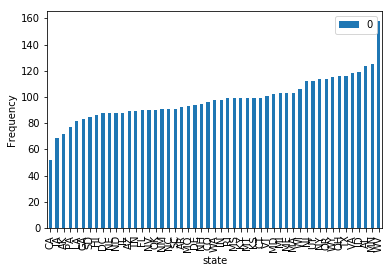

In [26]:
state_churn=pd.DataFrame(Churn.groupby('state').size())
state_churn=state_churn.sort_values(by=[0])
print(state_churn.head(10))
print(state_churn.tail(10))
state_churn.plot(kind='bar')
plt.ylabel('Frequency')

Text(0.5,1,'Churn by State')

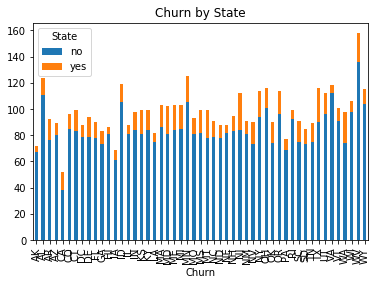

In [86]:
##Cross Tab States

state_churn_cross=pd.crosstab(Churn.state, Churn.churn,colnames=['State'],rownames=['Churn'])

state_churn_cross.plot(kind='bar', stacked=True)
plt.title('Churn by State')

                               account_length  number_vmail_messages  \
account_length                       1.000000              -0.014575   
number_vmail_messages               -0.014575               1.000000   
total_day_minutes                   -0.001017               0.005381   
total_day_calls                      0.028240               0.000883   
total_day_charge                    -0.001019               0.005377   
total_eve_minutes                   -0.009591               0.019490   
total_eve_calls                      0.009143              -0.003954   
total_eve_charge                    -0.009587               0.019496   
total_night_minutes                  0.000668               0.005541   
total_night_calls                   -0.007825               0.002676   
total_night_charge                   0.000656               0.005535   
total_intl_minutes                   0.001291               0.002463   
total_intl_calls                     0.014277               0.00

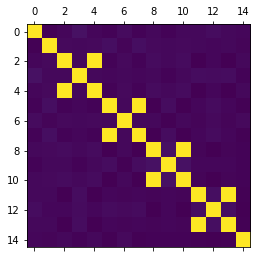

In [31]:
## Corelation
# Numerical
print(Churn.corr())
# Visual
plt.matshow(Churn.corr())

In [43]:
## Removing highly correlated columns.  
Churn2=Churn.drop(columns=['total_day_charge','total_eve_charge','total_intl_charge','total_night_charge'])
Churn2.head(10)
Churn2.shape

(5000, 16)

Area Code        no  yes
Churn                   
area_code_408  1082  177
area_code_415  2149  346
area_code_510  1062  184


Text(0.5,1,'Churn by Code')

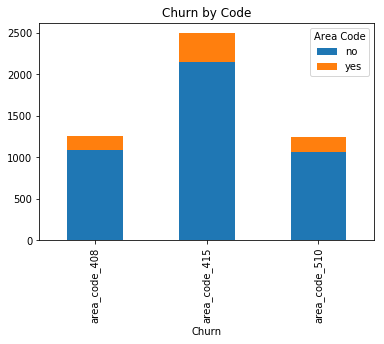

In [47]:
##Cross Tab States

code_churn_cross=pd.crosstab(Churn2.area_code, Churn2.churn,colnames=['Area Code'],rownames=['Churn'])
print(code_churn_cross)

code_churn_cross.plot(kind='bar', stacked=True)
plt.title('Churn by Code')


## Part D
Factors being dummied, missing values fixed.

In [48]:
for col in Churn2.columns[1:]:
	attName = col
	dType = Churn2[col].dtype
	missing = pd.isnull(Churn2[col]).any()
	uniqueCount = len(Churn2[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Churn2 = pd.concat([Churn2, pd.get_dummies(Churn2[col], prefix=col)], axis=1)
		del Churn2[attName]

## Part E
Train/Test 70/30

In [50]:
features_train, features_test, target_train, target_test = train_test_split(
    Churn2.iloc[:,1:].values, Churn2.iloc[:,0].values, test_size=0.30, random_state=0)

In [51]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1500, 69)
(3500, 69)
(1500,)
(3500,)


## Part F
Decision Tree 
Arguments Changed: Maximum Depth = 5, Class Weight = Balanced. 

Results 
- The DT correctly classified 93% of the predictions.  
- The CV shows that variation between validation is very small, indicating the majority of the variation in the data has been captured.  After furhter tuning this model may be able to be put into production.  

In [74]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(max_depth=5, class_weight="balanced")
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [75]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print("Classification Report")
print(classification_report(target_test, target_predicted_dt))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))


DT Accuracy Score 0.93
Classification Report
             precision    recall  f1-score   support

         no       0.96      0.95      0.96      1285
        yes       0.74      0.79      0.76       215

avg / total       0.93      0.93      0.93      1500

Confusion Matrix
[[1225   60]
 [  45  170]]


## Part G
Cross Validation - Decision Tree

In [76]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean()          

Cross Validation Score for each K [0.93009986 0.93295292 0.92571429 0.92846924 0.91702432]


0.9268521259372833

## Part H
KNN=3

Results 
- The KNN correctly classified 87% of the predictions.  
- The CV shows that variation between validation is very small, indicating the majority of the variation in the data has been captured.  After furhter tuning this model may be able to be put into production.  

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_knn = neigh.fit(features_train, target_train) 
target_predicted_knn = neigh_knn.predict(features_test)


In [78]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print("Classification Report")
print(classification_report(target_test, target_predicted_knn))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))


KNN Accuracy Score 0.876
Classification Report
             precision    recall  f1-score   support

         no       0.90      0.96      0.93      1285
        yes       0.62      0.35      0.45       215

avg / total       0.86      0.88      0.86      1500

Confusion Matrix
[[1238   47]
 [ 139   76]]


## Part I
Cross Validation - KNN

In [79]:
#verify KNN with Cross Validation
scores = cross_val_score(neigh_knn, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean()          

Cross Validation Score for each K [0.86305278 0.86733238 0.87714286 0.8769671  0.88268956]


0.8734369347109455

## Part J
Naive Bayes

Results 
- The NB correctly classified 60% of the predictions.  
- The CV indicates not all of the variation in the data has been captured.  This model needs more tuning and validation before deciding whether it is production ready.  

In [80]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_fit = nb.fit(features_train, target_train)
GaussianNB(priors=None)
target_predicted_nb = nb_fit.predict(features_test)


In [81]:
print("NB Accuracy Score", accuracy_score(target_test, target_predicted_nb))
print("Classification Report")
print(classification_report(target_test, target_predicted_nb))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_nb))

NB Accuracy Score 0.604
Classification Report
             precision    recall  f1-score   support

         no       0.89      0.61      0.73      1285
        yes       0.19      0.54      0.28       215

avg / total       0.79      0.60      0.66      1500

Confusion Matrix
[[789 496]
 [ 98 117]]


## Park K
CV on NB
This cross validation shows some scores that are far from the mean.  Telling us that no enough of the data variation has been captured in the Naive Bayes analysis.  I.E. it would not be wise to put this model into production without further bootstrapping applied or more data variation captured in the analysis.  

In [82]:
#verify NB with Cross Validation
scores = cross_val_score(nb_fit, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.57203994 0.65049929 0.66142857 0.59227468 0.60801144]


0.6168507848266745

## Part L
Random Forest

Results 
- The RF correctly classified 86% of the predictions.  
- The CV shows that variation between validation is very small, indicating the majority of the variation in the data has been captured.  After furhter tuning this model may be able to be put into production.  

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf_fit = rf.fit(features_train, target_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

target_predicted_rf = rf_fit.predict(features_test)



In [84]:
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print("Classification Report")
print(classification_report(target_test, target_predicted_rf))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))

RF Accuracy Score 0.862
Classification Report
             precision    recall  f1-score   support

         no       0.86      1.00      0.93      1285
        yes       1.00      0.04      0.07       215

avg / total       0.88      0.86      0.80      1500

Confusion Matrix
[[1285    0]
 [ 207    8]]


In [85]:
#verify RF with Cross Validation
scores = cross_val_score(rf_fit, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.86162625 0.86590585 0.86857143 0.86409156 0.87410587]


0.8668601900936824

## Results
After evaluating 4 models, I would easily pick the decision tree over the other models.  It has superior accuracy and passes the Cross Validation check.  With more tuning it could be put into production.  